
# Udemy Courses Analysis Project

## Project Overview

In this project, we will delve into a comprehensive analysis of a dataset containing information about Udemy courses. As an enthusiastic data analyst eager to work in the data field, you have a unique opportunity to gain valuable insights from this dataset while honing your skills in Python, SQL, Excel, and data analysis.

## Project Objective

The primary objective of this project is to extract actionable insights from the Udemy dataset. By leveraging your data analysis skills and industry expertise, we aim to achieve the following:

1.  **Gain Insights into Course Popularity:** We will explore which courses attract the most subscribers and why. This analysis will involve examining factors such as course subject, pricing, and content duration.
    
2.  **Pricing Strategies:** We will investigate Udemy's pricing strategies by analyzing the distribution of course prices. This analysis will help us understand how price affects course enrollment.
    
3.  **Subject Analysis:** We will categorize courses by subject and examine the distribution of courses within each subject. Are certain subjects more popular than others?
    
4.  **Trends and Patterns:** Identifying trends and patterns in the data will be a key focus. We will look for correlations between variables like the number of subscribers, the number of reviews, and course difficulty level.
    
5.  **Data Visualization:** Data visualization will play a crucial role in presenting our findings. We will use various charts and graphs to make the analysis results more accessible and understandable.
    
6.  **Python Code Optimization:** Throughout the project, we will ensure that our Python code adheres to the PEP-8 guidelines for code style and optimization. Clean and efficient code is essential for effective data analysis.
    
7.  **Documentation:** Detailed documentation of the code and analysis steps will be maintained, including comments in Python code. This documentation will serve as a reference for future work and collaborations.
    

## Dataset Description

The dataset consists of the following columns:

1.  `course_id`: Unique identifier for each course.
2.  `course_title`: The title or name of the course.
3.  `is_paid`: Indicates whether the course is paid (True/False).
4.  `price`: The price of the course.
5.  `num_subscribers`: The number of subscribers to the course.
6.  `num_reviews`: The number of reviews for the course.
7.  `num_lectures`: The number of lectures in the course.
8.  `level`: The difficulty level of the course (e.g., beginner, intermediate, advanced).
9.  `content_duration`: The duration of the course content.
10.  `published_timestamp`: The timestamp when the course was published.
11.  `subject`: The subject or category of the course.

## Import all required Libraries

In [1]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For better data  visualization
import re  # For regular expression operations
import klib as kb  # For data cleaning and visualization

#### Read the dataset with the pandas library

In [2]:
df = pd.read_csv("7. Udemy Courses.csv", encoding="UTF-8")

#### Let's Explore the dataset

In [3]:
# Print the top 5 lines of the  file.
df.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
# Print the bottom 5 lines of the file.
df.tail(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


We can observe that, in the dataset, the courses with no price is denoted by "Free". This will be changed to 0 for better analysis.

In [5]:
# Change the Free price value with 0
df["price"] = df["price"].apply(lambda x: 0 if x == "Free" else x)

df.tail(5)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,0,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


Also, is_paid column is of boolean type. We will convert it to 0 and 1 for better analysis.

In [6]:
# Also, is_paid column is of boolean type. We will convert it to 0 and 1 for better analysis.
df["is_paid"] = df["is_paid"].apply(lambda x: 1 if x == True else 0)

df.tail(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,1,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,1,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,1,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


Let's convert the content_duration column to minutes for better analysis.

In [7]:
# Convert time values to minutes and create a new column
# %%timeit  # This is a magic function to calculate the time of execution of the code
# %%timeit

def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    if "hour" in time_str:
        hours_match = re.search(r"(\d+(\.\d+)?)\s*hour", time_str)
        if hours_match:
            hours = float(hours_match.group(1))
    if "min" in time_str:
        minutes_match = re.search(r"(\d+)\s*min", time_str)
        if minutes_match:
            minutes = int(minutes_match.group(1))
    return int(hours * 60 + minutes)


df["course_duration (in minutes)"] = df["content_duration"].apply(
    convert_to_minutes
)


# Let's drop the  content_duration column
df.drop(columns=["content_duration"], inplace=True)
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,published_timestamp,subject,course_duration (in minutes)
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,1,35,3137,18,68,All Levels,2014-09-18T05:07:05Z,Musical Instruments,90
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,1,75,1593,1,41,Intermediate Level,2017-04-12T19:06:34Z,Musical Instruments,60
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,1,75,482,1,47,Intermediate Level,2017-04-26T18:34:57Z,Musical Instruments,90


As we can observe, the published_timestamp column contains the date and time of publishing the course. We will extract the year, month and day from this column for better analysis.

In [8]:
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])
df["published_year"] = df["published_timestamp"].dt.year
df["published_month"] = df["published_timestamp"].dt.month
df["published_day"] = df["published_timestamp"].dt.day
df.drop(columns=["published_timestamp"], inplace=True)
df.tail(3)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,40,723,130,37,All Levels,Web Development,390,2015,11,11
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26
3681,964478,Zombie Apocalypse Photoshop Actions,1,50,12,1,15,All Levels,Graphic Design,90,2016,9,26


In [9]:
# Print the number of rows and columns in the data frame.
df.shape

(3682, 13)

So we have 3682 rows and 11 columns in our dataset. Let's check the data types of each column.

In [10]:
# Check the data types of the columns.
df.dtypes

course_id                        int64
course_title                    object
is_paid                          int64
price                           object
num_subscribers                  int64
num_reviews                      int64
num_lectures                     int64
level                           object
subject                         object
course_duration (in minutes)     int64
published_year                   int32
published_month                  int32
published_day                    int32
dtype: object

We can observe that, `price ` column is of object type. We will convert it to *int* type for enabling easier pricing strategy exploration.

In [11]:
# Change the data type of price column to int
df["price"] = df["price"].astype("int")

In [12]:
# Let's remove the course_id column as it is not required for analysis.
df.drop(columns=["course_id"], inplace=True)


Check for null values in the data set

In [13]:
df.isnull().sum()


course_title                    0
is_paid                         0
price                           0
num_subscribers                 0
num_reviews                     0
num_lectures                    0
level                           0
subject                         0
course_duration (in minutes)    0
published_year                  0
published_month                 0
published_day                   0
dtype: int64

So, there are no null values in our dataset which is kind of a good thing. :) <br />
Let's proceed further

#### Let's have a look at the statistical summary of the dataset

In [14]:
df.describe()
# describe() function gives us the statistical summary of the numerical columns in the data frame.


,is_paid,price,num_subscribers,num_reviews,num_lectures,course_duration (in minutes),published_year,published_month,published_day
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,0.915807,66.010320,3194.230310,156.093156,40.065182,245.404128,2015.432917,6.164041,15.840576
std,0.277715,60.984167,9499.378361,934.957204,50.373299,363.123236,1.185800,3.378702,8.782027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000
25%,1.000000,20.000000,110.250000,4.000000,15.000000,60.000000,2015.000000,3.000000,8.000000
50%,1.000000,45.000000,911.500000,18.000000,25.000000,120.000000,2016.000000,6.000000,16.000000
75%,1.000000,95.000000,2540.250000,67.000000,45.000000,270.000000,2016.000000,9.000000,23.000000
max,1.000000,200.000000,268923.000000,27445.000000,779.000000,4710.000000,2017.000000,12.000000,31.000000


In [39]:
# Let's find out course with maximum number of subscribers and print the details
max_subscribers = df["num_subscribers"].max()
df[df["num_subscribers"] == max_subscribers]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day
2230,Learn HTML5 Programming From Scratch,0,0,268923,8629,45,All Levels,Web Development,630,2013,2,14


In [40]:
# Let's find out course with maximum number of reviews and print the details
max_reviews = df["num_reviews"].max()
df[df["num_reviews"] == max_reviews]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day
3385,The Web Developer Bootcamp,1,200,121584,27445,342,All Levels,Web Development,2580,2015,11,2


#### Co-relation between the columns

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

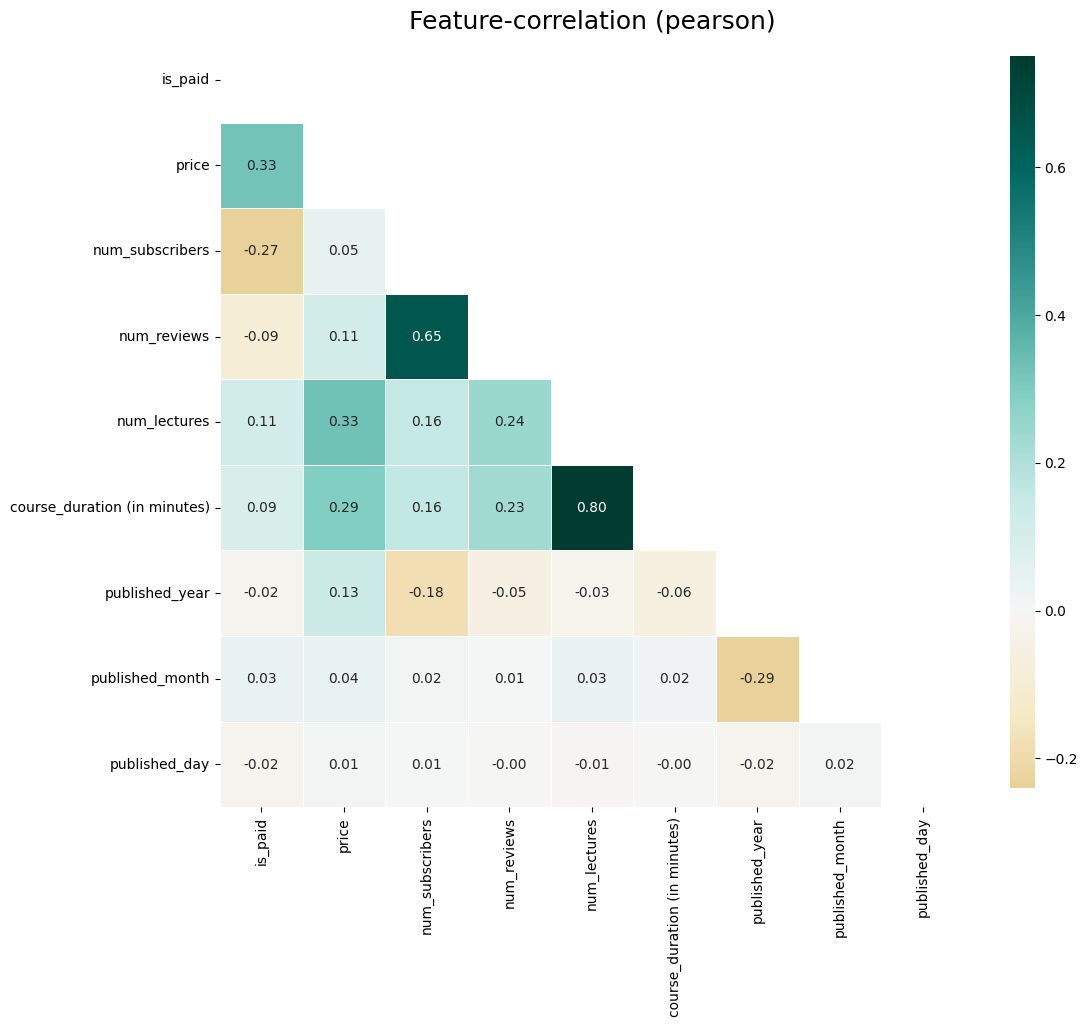

In [15]:
# Let's plot correlation matrix to see the correlation between the variables using klip library function corr_plot().
kb.corr_plot(df, annot=True)

#### Insights from Correlations

Strong correlation (0.80) between 'num_lectures' and 'course_duration' suggests lecture count affects content duration. <br />

Moderate correlation (0.65) between 'num_reviews' and 'num_subscribers' indicates more subscribers lead to more reviews. <br />

Weak correlations (0.05 and 0.11) suggest minimal influence of 'price' on 'num_subscribers' and 'num_reviews.'


#### Course Subjects Distribution

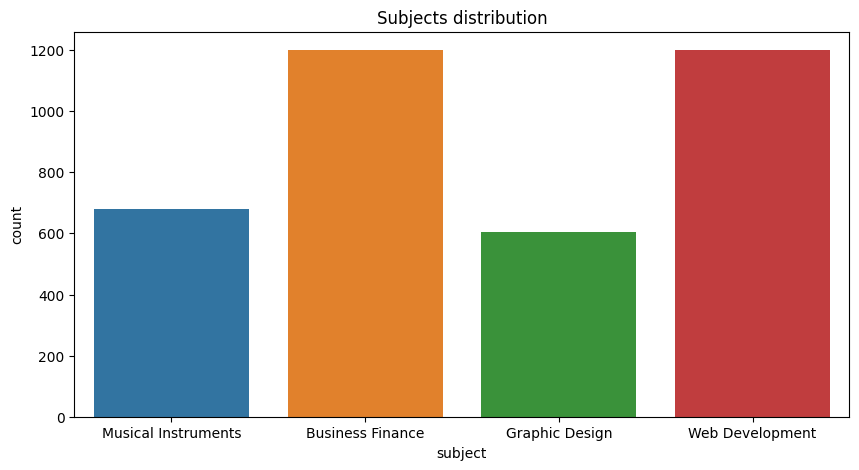

In [16]:
# Let's see the subjects distribution in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x="subject", data=df)
plt.title("Subjects distribution")
plt.show()

This analysis visualizes the distribution of courses by subject, helping identify the most and least popular subjects.

#### Price Distribution

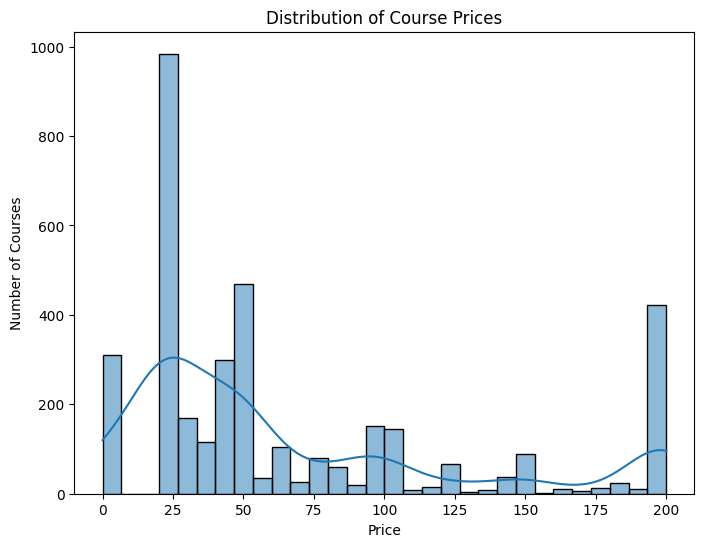

In [17]:
# Visualization of course price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Number of Courses')
plt.show()


This analysis visualizes the distribution of course prices, allowing you to understand how prices are distributed across courses.

#### Published Year Trends

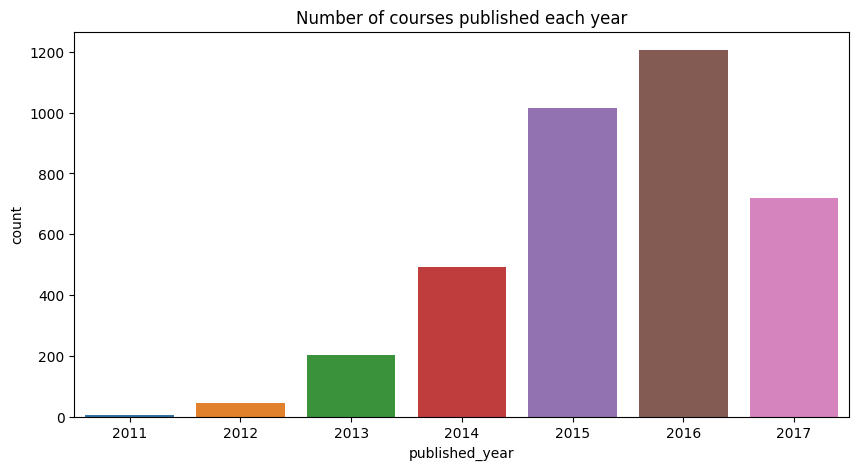

In [18]:
# Let's see the number of courses published each year
plt.figure(figsize=(10, 5))
sns.countplot(x="published_year", data=df)
plt.title("Number of courses published each year")
plt.show()

This line plot shows how course publications have changed over the years, highlighting trends and patterns

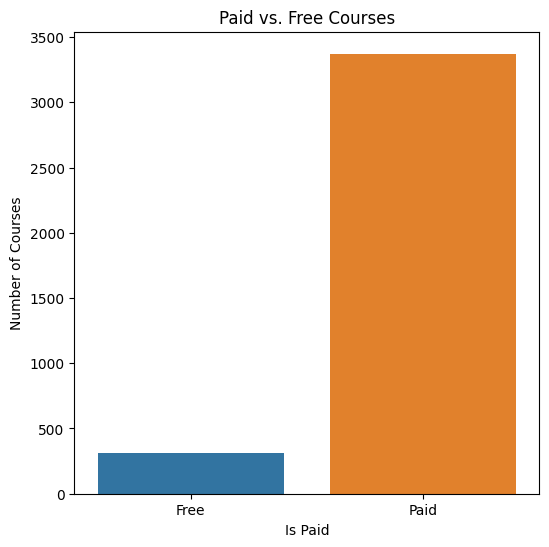

In [19]:
# Analysis 5: Paid vs. Free Courses
paid_counts = df['is_paid'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=paid_counts.index, y=paid_counts.values)
plt.title('Paid vs. Free Courses')
plt.xlabel('Is Paid')
plt.ylabel('Number of Courses')
plt.xticks(ticks=[0, 1], labels=['Free', 'Paid'])
plt.show()
# Explanation: This analysis compares the number of paid and free courses, providing insights into the course pricing strategy.


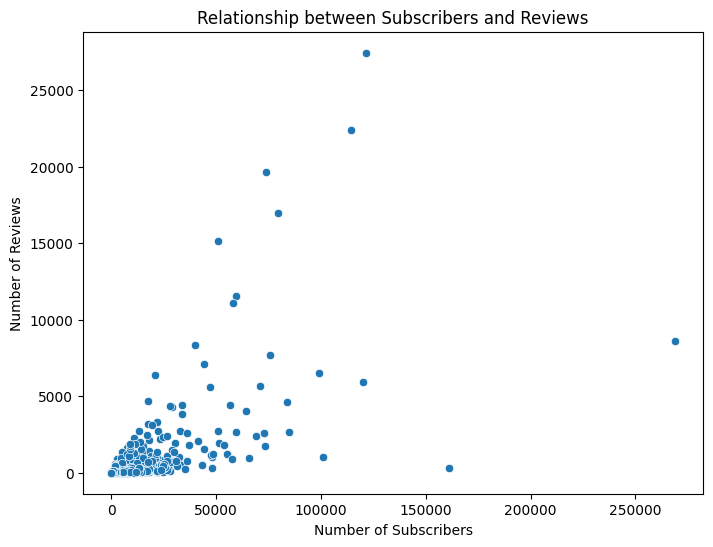

In [20]:
# Analysis 6: Reviews vs. Subscribers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='num_subscribers', y='num_reviews')
plt.title('Relationship between Subscribers and Reviews')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Reviews')
plt.show()
# Explanation: This scatter plot explores the relationship between the number of subscribers and the number of reviews.


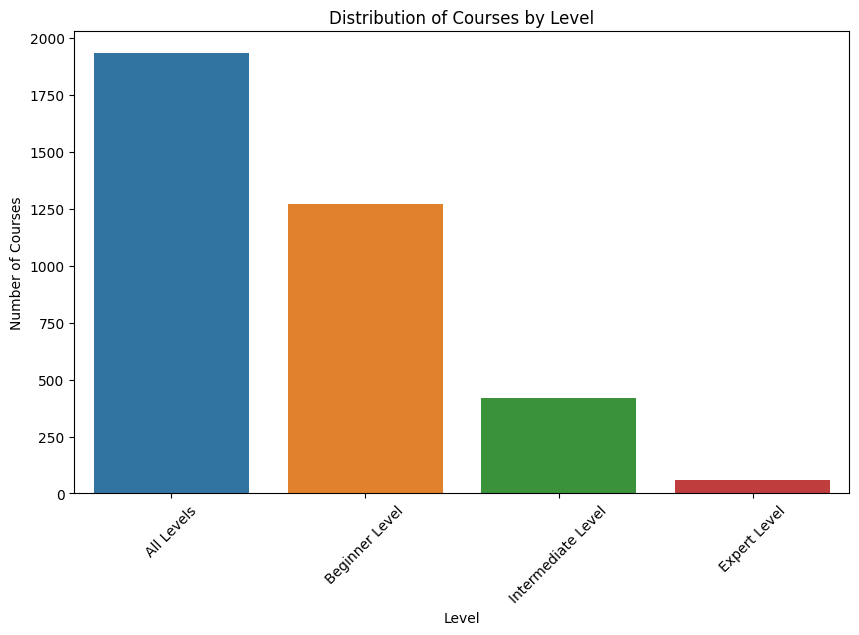

In [21]:
# Analysis 7: Course Level Distribution
level_counts = df['level'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=level_counts.index, y=level_counts.values)
plt.title('Distribution of Courses by Level')
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()
# Explanation: This analysis visualizes the distribution of courses by difficulty level.


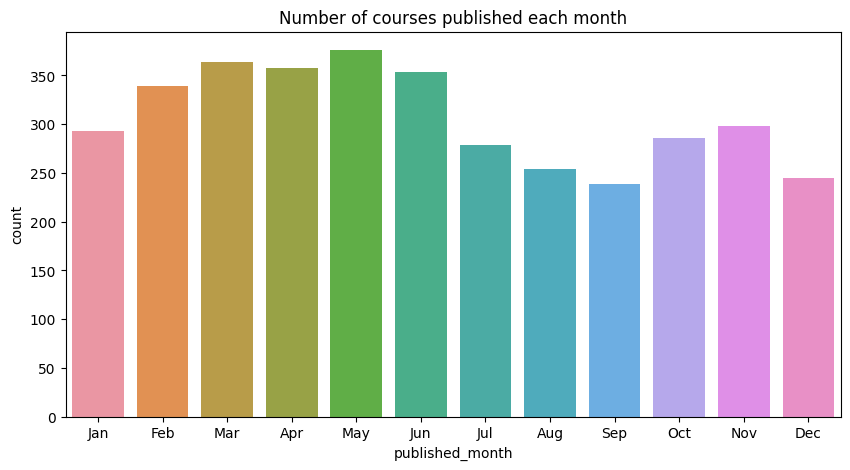

In [22]:
# Let's see the number of courses published each month
plt.figure(figsize=(10, 5))
sns.countplot(x="published_month", data=df)
plt.title("Number of courses published each month")

# Set the x-axis tick labels to month names
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()
# Explanation: This line plot illustrates how course publications vary by month, revealing monthly trends.


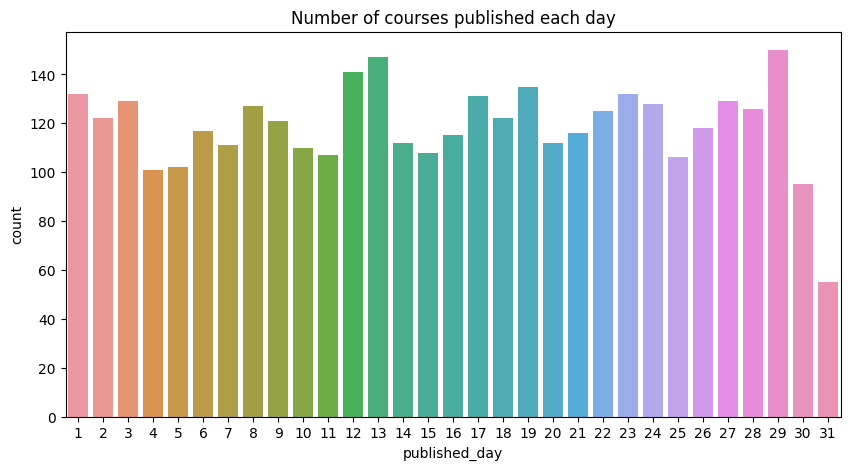

In [23]:
# Let's see the number of courses published each day
plt.figure(figsize=(10, 5))
sns.countplot(x="published_day", data=df)
plt.title("Number of courses published each day")
plt.show()
# Explanation: This line plot shows how course publications vary by day of the week, revealing weekly trends.


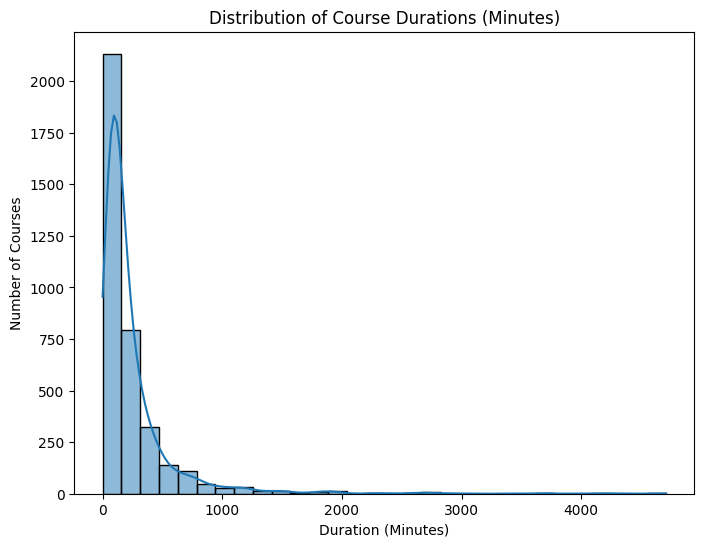

In [24]:
# Analysis 10: Course Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['course_duration (in minutes)'], bins=30, kde=True)
plt.title('Distribution of Course Durations (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Courses')
plt.show()
# Explanation: This analysis visualizes the distribution of course durations in minutes, helping you understand content length.


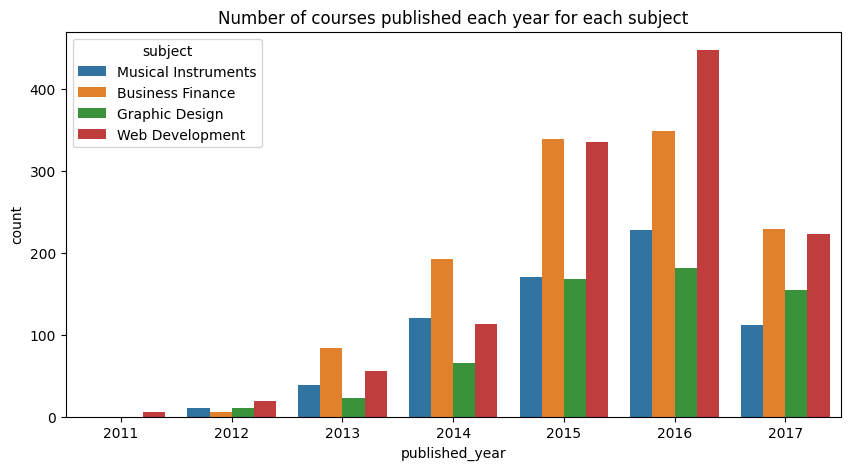

In [25]:
# Let's see the number of courses published each year for each subject
plt.figure(figsize=(10, 5))
sns.countplot(x="published_year", hue="subject", data=df)
plt.title("Number of courses published each year for each subject")
plt.show()

In [35]:
df.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'subject', 'course_duration (in minutes)',
       'published_year', 'published_month', 'published_day'],
      dtype='object')

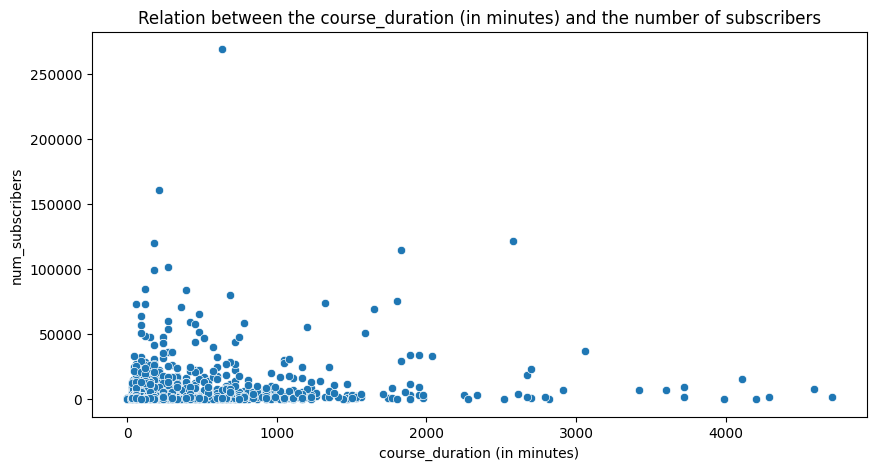

In [38]:
# Let's check if there is any relation between the course_duration (in minutes) and the number of subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x="course_duration (in minutes)", y="num_subscribers", data=df  )
plt.title("Relation between the course_duration (in minutes) and the number of subscribers")
plt.show()

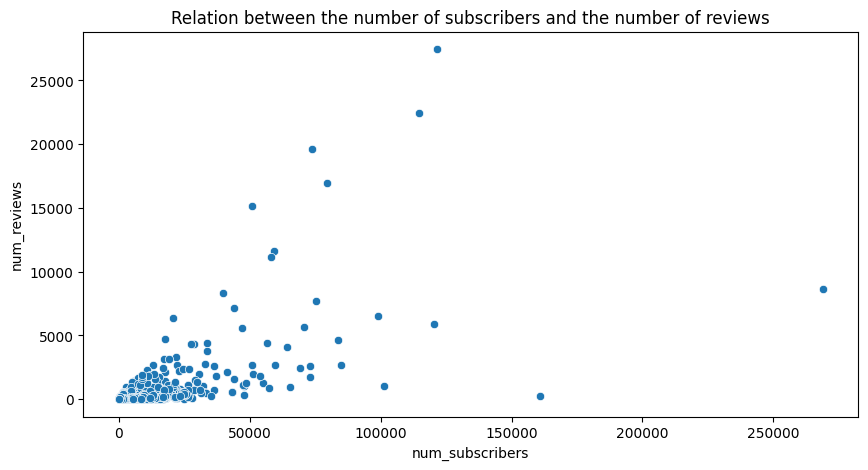

In [27]:
# Let's check if there is any relation between the number of subscribers and the number of reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x="num_subscribers", y="num_reviews", data=df)
plt.title("Relation between the number of subscribers and the number of reviews")
plt.show()

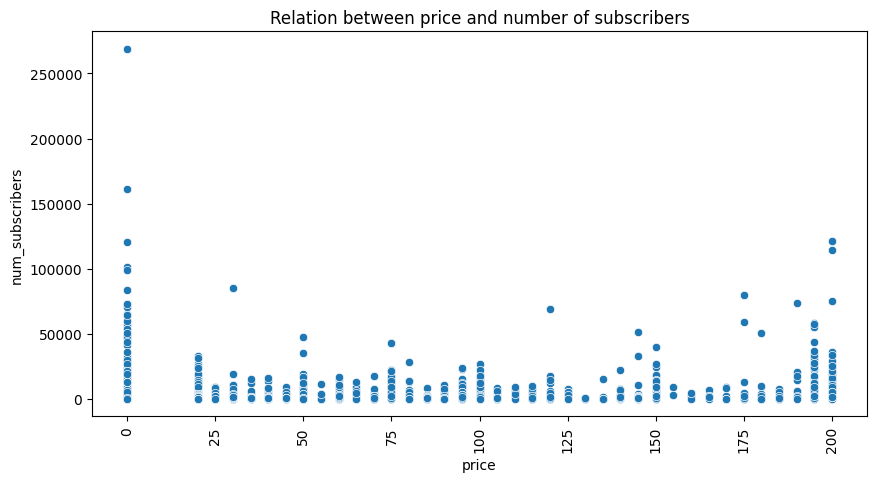

In [28]:

# Let's check if there is any co-relation between price and number of subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x="price", y="num_subscribers", data=df)
plt.title("Relation between price and number of subscribers")

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90 )

plt.show()

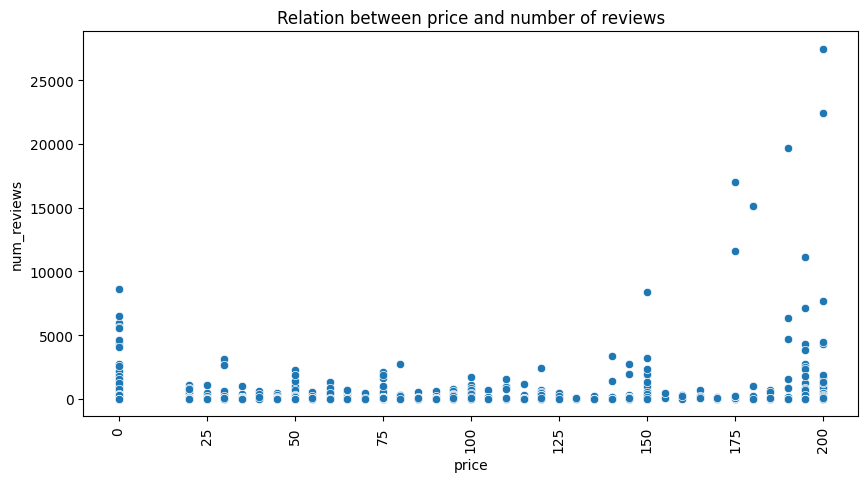

In [29]:
# Let's check if there is any co-relation between price and number of reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x="price", y="num_reviews", data=df)
plt.title("Relation between price and number of reviews")

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90 )

plt.show()

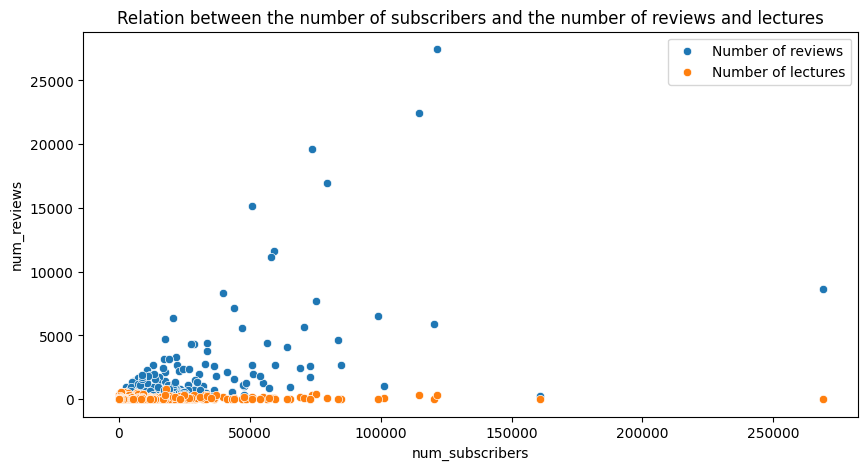

In [30]:
# Let's find out course with maximum number of subscribers
df[df["num_subscribers"] == df["num_subscribers"].max()]

# Let's find out course with maximum number of reviews
df[df["num_reviews"] == df["num_reviews"].max()]

# Let's find out course with maximum number of lectures
df[df["num_lectures"] == df["num_lectures"].max()]

# Let's plot all these
plt.figure(figsize=(10, 5))
sns.scatterplot(x="num_subscribers", y="num_reviews", data=df)
sns.scatterplot(x="num_subscribers", y="num_lectures", data=df)
plt.title("Relation between the number of subscribers and the number of reviews and lectures")
plt.legend(["Number of reviews", "Number of lectures"])
plt.show()